<a href="https://colab.research.google.com/github/JeremiahKamama/Spacy-Analysis/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import spacy
import string
import xgboost as xgb
import re



from spacy.lang.en import English
from spacy.tokens import Doc
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.tokenizer import Tokenizer


from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline



from wordcloud import WordCloud



In [4]:
nlp = spacy.load("en_core_web_sm")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
imdb = pd.read_csv('/content/drive/MyDrive/data/IMDB.csv')

imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


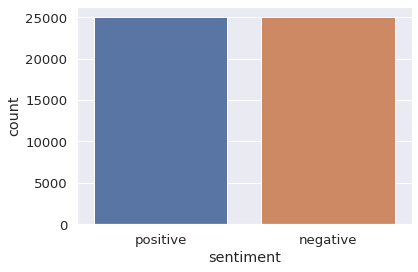

In [7]:
sns.set(style = 'darkgrid', font_scale = 1.2)
sns.countplot(imdb.sentiment)

In [8]:
imdb.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [9]:
imdb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [10]:
imdb.sentiment.replace("positive", 1 , inplace= True)
imdb.sentiment.replace("negative", 0, inplace= True)
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [11]:
miss_val = imdb.isnull().sum()

miss_val[0:10]

review       0
sentiment    0
dtype: int64

In [12]:
stopwords = list(STOP_WORDS)
print(stopwords)

['namely', 'nowhere', 'often', 'afterwards', 'by', 'fifteen', 'two', 'same', 'but', 'doing', 'off', 'less', 'here', 'anyway', 'out', 'to', 'beyond', 'former', 'unless', 'can', 'across', 'say', '’d', 'became', 'among', 'them', 'upon', 'itself', 'one', 'another', '‘m', 'somewhere', 'nor', 'before', 'was', 'four', 'cannot', 'perhaps', 'ca', 'least', 'go', 'made', 'whereafter', 'last', 'mine', 'might', 'keep', 'other', 'full', 'onto', 'besides', 'whoever', 'thereby', 'back', 'into', 'are', "'m", 'ten', 'show', 'side', 'which', 'nobody', 'amongst', 'rather', 'whereby', 'regarding', 'using', 'well', 'yours', 'could', 'anyone', 'has', 'not', 'amount', '’ve', 'bottom', 'various', 'first', 'behind', 'elsewhere', 'he', 'herein', 'been', 'your', 'around', 'empty', 'only', 'more', 'whither', 'how', 'top', 'per', 'hundred', 'hereafter', 'beforehand', 'be', 'along', 'mostly', 'since', 'most', 'wherein', 'everywhere', 'thus', 'else', 'hers', 'becomes', 'so', 'our', 'over', 'fifty', 'towards', 'quite'

In [13]:
punct = string.punctuation
print(punct)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [14]:
imdb['review'] = imdb['review'].apply(lambda x: re.sub('[,\.!?:()"]', '', x))
imdb['review'] = imdb['review'].apply(lambda x: re.sub('[^a-zA-Z"]', ' ', x))
imdb['review'] = imdb['review'].apply(lambda x: x.lower())
imdb['review'] = imdb['review'].apply(lambda x: x.strip())


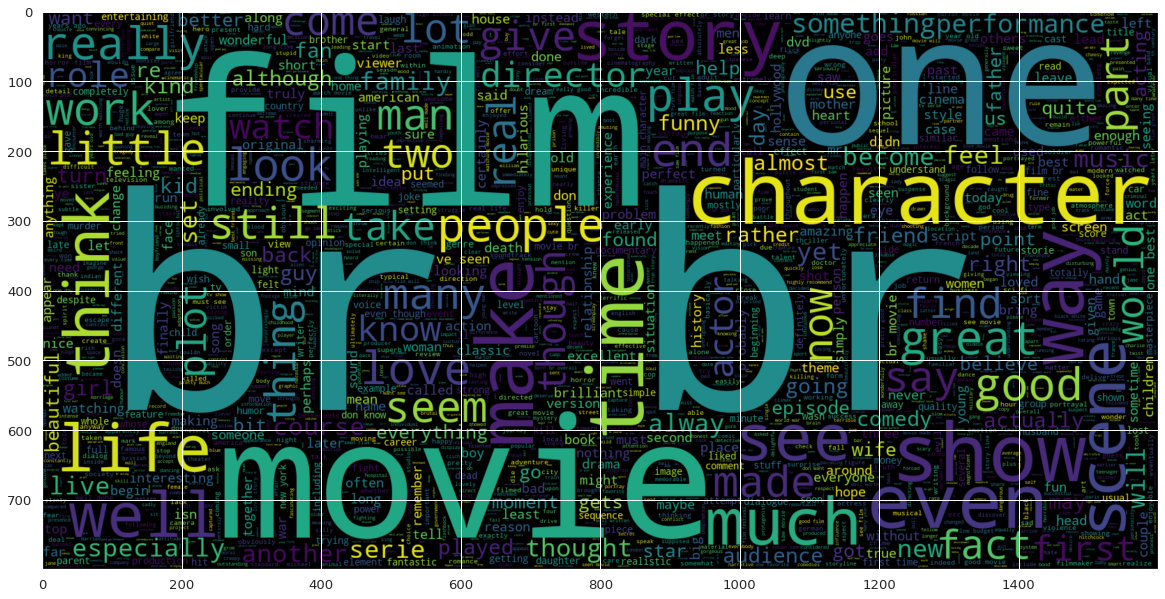

In [15]:
plt.figure(figsize = (20,20))
cloud = WordCloud(max_words= 2000, width= 1600,height= 800).generate("".join(imdb[imdb.sentiment == 1].review))
plt.imshow(cloud, interpolation='bilinear')

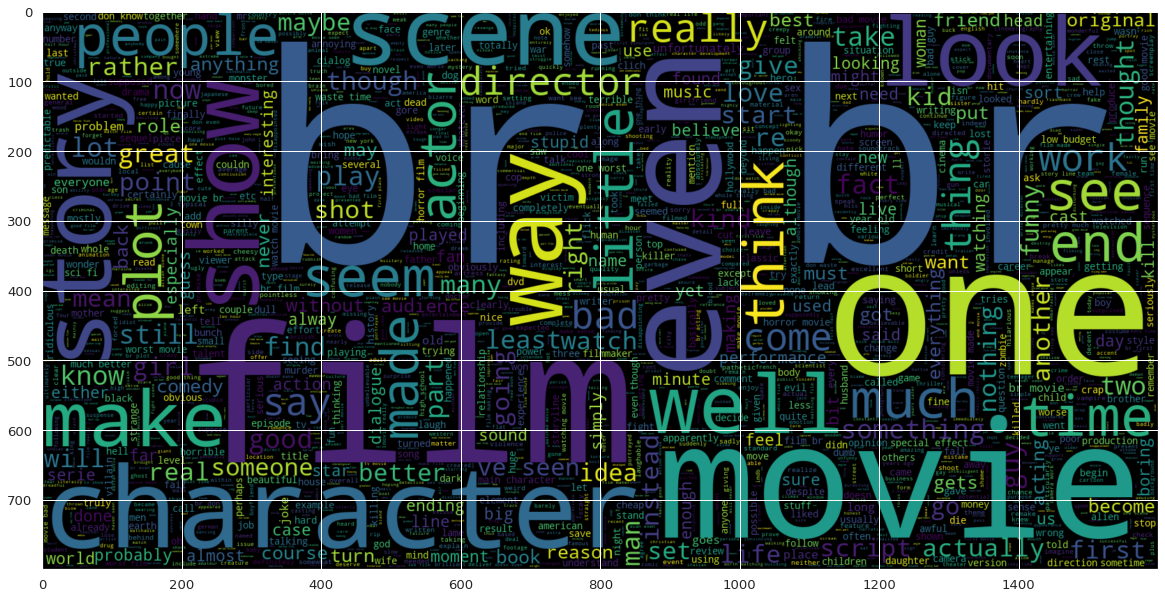

In [16]:
plt.figure(figsize = (20,20))
cloud = WordCloud(max_words= 2000, width= 1600,height= 800).generate("".join(imdb[imdb.sentiment == 0].review))
plt.imshow(cloud, interpolation='bilinear')

In [17]:
X = imdb['review']
y = imdb['sentiment']

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)



In [18]:

#learning_rate=0.1, max_depth=7,n_estimators=80,use_label_encoder=False,eval_metric='auc'
#tfidf = TfidfVectorizer(tokenizer = clean_data)


#steps = [('tfidf',tfidf), ('classifier', xgb.XGBClassifier(random_state=1,learning_rate=0.1))]

#pipe = Pipeline(steps)


 

In [19]:
 def spacy_tokenizer(sentence):
  doc = nlp(sentence)
  tokens =[]

  for token in doc:
    if token.lemma_ != '-PRON-':
      temp = token.lemma_.lower().strip()
    else:
      temp = token.lower_
    tokens.append(temp)

  clean_tokens = []
  for token in tokens:
    if token not in punct:
      clean_tokens.append(token)
  return clean_tokens

In [20]:
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

pipe = Pipeline([('bow',CountVectorizer()),('tfidf',TfidfTransformer()),('model', MultinomialNB())])



In [21]:

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print(f"F1 Score : {f1} and Accuracy Score {accuracy}")


F1 Score : 0.8607905219078746 and Accuracy Score 0.8637


In [22]:
text_cf = Pipeline([('tfidf', TfidfVectorizer()),('classifier',LinearSVC(),)])

In [23]:
text_cf.fit(X_train,y_train)

predictions = text_cf.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)

f1 = f1_score(y_test,y_pred)

print(f"F1 Score : {f1} and Accuracy Score {accuracy}")

F1 Score : 0.8607905219078746 and Accuracy Score 0.8637


In [24]:
imdb = imdb['review']

In [25]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Embedding,LSTM
from tensorflow.python.keras.preprocessing.text import Tokenizer
from keras.optimizers import Adam
from keras.layers import Dropout
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.models import load_model

In [26]:
tokenizer = Tokenizer(num_words= 15000)
tokenizer.fit_on_texts(imdb)

In [27]:
train_tokens = tokenizer.texts_to_sequences(X_train)
test_tokens = tokenizer.texts_to_sequences(X_test)

In [28]:
num_tokens = [len(tokens) for tokens in train_tokens + test_tokens]
num_tokens = np.array(num_tokens)

In [29]:
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

567

In [30]:
train_pad = pad_sequences(train_tokens, maxlen=max_tokens)
test_pad = pad_sequences(test_tokens, maxlen=max_tokens)


In [31]:
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))

def return_to_sentence(tokens):
    words = [inverse_map[token] for token in tokens if token!=0]
    text = ' '.join(words)
    return text

In [32]:
print(return_to_sentence(train_pad[8]))

the people who are bad this film are those who don t understand film to begin with these are the people who love movie blockbusters and to any movie that doesn t star leonardo dicaprio wilder is a neat little film that may seem quirky and maybe even stupid at first but what it lacks in plot it more than makes up for in substance br br one thing in particular about the movie that impressed me was it s use of music which plays a large part those students of film music will notice how important music is in the movie both in and wilder s life and in the background wilder s theme s theme and wallace s theme are all heard in the opening sequence and it is funny how some of the lyrics play out for instance in the scene where the men are singing duke of earl is with wilder when the men sing something like she is my girl and then she goes over to wallace to give him something when the men sing the she will be my girl cleverly showing the tension between the two brothers there are all sorts of l

In [33]:
print(train_pad[8])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

In [34]:
from keras import Sequential 
from keras.layers import Embedding,LSTM,Dense, Dropout

embedding_size=100

model = Sequential()

model.add(Embedding(input_dim=15000,output_dim=embedding_size,input_length=max_tokens,name="embedding_layer"))

model.add(LSTM(units=16,return_sequences= True))
model.add(Dropout(0.1))

model.add(LSTM(units=8,return_sequences=True))
model.add(Dropout(0.1))

model.add(LSTM(units=4))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=1e-3)

model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 567, 100)          1500000   
_________________________________________________________________
lstm (LSTM)                  (None, 567, 16)           7488      
_________________________________________________________________
dropout (Dropout)            (None, 567, 16)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 567, 8)            800       
_________________________________________________________________
dropout_1 (Dropout)          (None, 567, 8)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 4)                 208       
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0

In [36]:
history = model.fit(train_pad, y_train, validation_split=0.3, epochs=5, batch_size=1000, shuffle=True, verbose = 1)

Epoch 1/5
28/28 [==============================] - 32s 298ms/step - loss: 0.6897 - accuracy: 0.5591 - val_loss: 0.6478 - val_accuracy: 0.7038
Epoch 2/5
28/28 [==============================] - 7s 242ms/step - loss: 0.6042 - accuracy: 0.7688 - val_loss: 0.5309 - val_accuracy: 0.8270
Epoch 3/5
28/28 [==============================] - 6s 227ms/step - loss: 0.5007 - accuracy: 0.8590 - val_loss: 0.4892 - val_accuracy: 0.8303
Epoch 4/5
28/28 [==============================] - 6s 229ms/step - loss: 0.4414 - accuracy: 0.8803 - val_loss: 0.4455 - val_accuracy: 0.8488
Epoch 5/5
28/28 [==============================] - 6s 229ms/step - loss: 0.3869 - accuracy: 0.9038 - val_loss: 0.4213 - val_accuracy: 0.8513


In [37]:
result = model.evaluate(test_pad, y_test)


313/313 [==============================] - 9s 24ms/step - loss: 0.4157 - accuracy: 0.8566


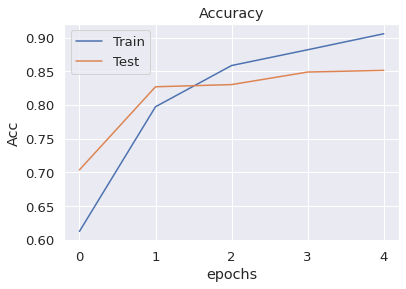

In [38]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()


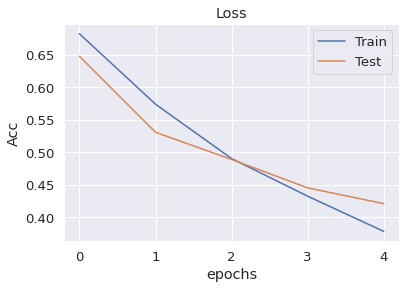

In [39]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()


In [40]:
!pip install transformers
!pip install torchvision

In [41]:
import transformers
from transformers import DistilBertTokenizer, DistilBertConfig,DistilBertModel

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchtext.legacy import data,datasets
from torch.utils.data import DataLoader
from torchtext.legacy.data import BucketIterator
from torchtext.datasets import IMDB


import random
import time

In [111]:
config = DistilBertConfig.from_pretrained('distilbert-base-uncased')
model_name = DistilBertModel.from_pretrained('distilbert-base-uncased')
NUM_EPOCHS = 3
LEARNING_RATE = 1e-5
max_length = 512
TRUNCATION = True
BATCH_SIZE = 32
WEIGHT_DECAY = 1e-3
SEED = 42
num_classes = 2
FP_16 = dict(opt_level="01")
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [43]:
eos_token = tokenizer.sep_token
unk_token = tokenizer.unk_token
pad_token = tokenizer.pad_token
init_token = tokenizer.cls_token


In [44]:
init_token_idx = tokenizer.cls_token_id
eos_token_idx = tokenizer.sep_token_id
pad_token_idx = tokenizer.pad_token_id
unk_token_idx = tokenizer.unk_token_id

In [46]:
max_length = tokenizer.max_model_input_sizes['distilbert-base-uncased']

print(max_length)

512


In [52]:
def tokenize_cut(sentence):
  tokens = tokenizer.tokenize(sentence)
  tokens = tokens[:max_length-2]
  return tokens

In [53]:
TEXT = data.Field(batch_first = True,
                  use_vocab = False,
                  tokenize = tokenize_cut,
                  preprocessing = tokenizer.convert_tokens_to_ids,
                  init_token = init_token_idx,
                  eos_token = eos_token_idx,
                  pad_token = pad_token_idx,
                  unk_token = unk_token_idx)

LABEL = data.LabelField(dtype = torch.float)

In [54]:
train_data, test_data = datasets.IMDB.splits(TEXT, LABEL)

In [55]:
print(train_data.shape, test_data.shape)

<generator object Dataset.__getattr__ at 0x7f01c17c8c50> <generator object Dataset.__getattr__ at 0x7f01c17c8dd0>


In [69]:
LABEL.build_vocab(train_data)

In [70]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [71]:
train_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, test_data), 
    batch_size = BATCH_SIZE, 
    device = device)

In [210]:
class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        config = DistilBertConfig.from_pretrained('distilbert-base-uncased')
        self.distilBert = DistilBertModel.from_pretrained('distilbert-base-uncased',config=config)
        self.fc0 = nn.Linear(768,512)
        self.d0 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(512,256)
        self.d1 = nn.Dropout(0.5)
        #self.fc2 = nn.Linear(256,1)
        nn.init.normal_(self.fc0.weight,std= 0.1)
        nn.init.normal_(self.fc0.bias ,0.)
        nn.init.normal_(self.fc1.weight,std =0.1)
        nn.init.normal_(self.fc1.bias, 0.)
        #nn.init.normal_(self.fc2.weight,std=0.1)
        #nn.init.normal_(self.fc2.bias , 0.)

        
    def forward(self,input_ids,attention_mask):
        hid= self.distilBert(input_ids,attention_mask = attention_mask)
        hid= hid[0][:,0]
        x = self.fc0(hid)
        x = F.relu(x)
        x = self.d0(x)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.d1(x)
        return self.fc1(x)

In [211]:
criterion = nn.BCEWithLogitsLoss(reduction='mean').to('cuda')
model = Model().to('cuda')
for params in model.distilBert.parameters():
    params.require_grad = False
    params._trainable = False
optimizer = torch.optim.AdamW(model.parameters(),lr=2e-5)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


RuntimeError: ignored

In [205]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if param.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 66,887,936 trainable parameters


In [ ]:
for name, param in model.named_parameters():                
    if param.requires_grad:
        print(name)

In [207]:
model = model.to(device)
criterion = model.to(device)

RuntimeError: ignored

In [149]:
def binary_accuracy(preds,y):
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float()
    acc = correct.sum()/ len(correct)

    return acc

In [166]:
def train(model,train_iterator,optimizer,criterion):

    epoch_loss = 0
    epoch_acc = 0
    model.train()
    
    for batch in train_iterator:
        
        optimizer.zero_grad()
        
        predictions = model(batch.text).squeeze(1)
        
        loss = criterion(predictions, batch.label.float())
        
        acc = binary_accuracy(predictions, batch.label.float())
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [167]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:

            predictions = model(batch.text).squeeze(1)
            
            loss = criterion(predictions, batch.label.float())
            
            acc = binary_accuracy(predictions, batch.label.float())

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [168]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [169]:
 for epoch in range(NUM_EPOCHS):
    
    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer,criterion)
    test_loss, test_acc = evaluate(model, test_iterator, criterion)
        
    end_time = time.time()
        
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
        
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

RuntimeError: ignored

In [ ]:
def prediction(model, test_set: int, max_len: int = 512, device = 'cpu'):
    x_encoded = tokenizer.encode_plus(sentence, add_special_tokens=True, pad_to_max_length=True, max_length=max_len, return_tensors="pt",).to(device)
    logits = model(x_encoded['input_ids'], x_encoded['attention_mask'])
    probabilities = F.softmax(logits.detach(), dim=1)
    output = probabilities.max(axis=1)
    print(sentence)
    print(f"Class: {['Negative' if output.indices[0] == 0 else 'Positive'][0]}") 
    #Probability: {output.values[0]:.4f}")